# AUTsinphiS Analysis

In [1]:
import sys
import os; #os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint
from tools.config import load_config, conf
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
load_config('input_aUTspS.py')
conf['resman']=RESMAN()
conf['parman']=PARMAN()
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 9022

## Load AUTsinphiS data from files

In [4]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([          u'N',          u'Q2',       u'Shift',           u'W',
                u'W2',       u'alpha',         u'col',  u'dependence',
                u'dy',   u'er_stat_u',      u'hadron',         u'obs',
                u'pT', u'r-residuals',   u'residuals',       u'shift',
            u'target',         u'thy',       u'value',           u'x',
                 u'y',          u'yh',          u'yp',           u'z'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [5]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: compass, Observerable: AUTsinphiS, Points: 32


## Plot results 
Plot the data vs. theory curves

In [6]:
data = {}

for key, value in conf['resman'].sidisres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [7]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [9]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([          u'N',          u'Q2',       u'Shift',           u'W',
                u'W2',       u'alpha',         u'col',  u'dependence',
                u'dy',   u'er_stat_u',      u'hadron',         u'obs',
                u'pT', u'r-residuals',   u'residuals',       u'shift',
            u'target',         u'thy',       u'value',           u'x',
                 u'y',          u'yh',          u'yp',           u'z'],
      dtype='object')

In [10]:
def plotAUTsinphiS(data1,data2,data3,data4,label1='dataset 1',label2='dataset2',label3='dataset3',label4='dataset4'):

    data = [data1,data2,data3,data4]
    
    plt.figure(figsize=(10,10))
    
    _label=label1
    xlabel='$var$'
    xlim = [0.1,0.8]
    
    for k in range(len(data)):
    
        
    
        data_sub = data[k]
        
        if k==0: 
            plt.subplot(2, 2, 1)
            _label=label1
            xlabel='$z$'
            xlim=[0.0,0.8]
            plt.errorbar(data_sub.z, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='blue', label=_label)
            plt.plot(data_sub.z, data_sub.thy, linestyle='-', color='blue')
            data_sub = data[k+1]
            _label=label2
            #xlabel='$x$'
            #xlim=[0.0,0.7]
            plt.errorbar(data_sub.z, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=_label)
            plt.plot(data_sub.z, data_sub.thy, linestyle='-', color='red')
        elif k==2: 
            plt.subplot(2, 2, 2)
            _label=label3
            xlabel='$x$'
            xlim=[0.0,0.8]
            plt.errorbar(data_sub.x, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='blue', label=_label)
            plt.plot(data_sub.x, data_sub.thy, linestyle='-', color='blue')
            data_sub = data[k+1]
            _label=label4
            #xlabel='$x$'
            #xlim=[0.0,0.7]
            plt.errorbar(data_sub.x, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=_label)
            plt.plot(data_sub.x, data_sub.thy, linestyle='-', color='red')
        #elif k==2: 
            
        #elif k==3: 
            
    
        plt.xlim(xlim)
        plt.xlabel(xlabel)
        plt.title(_label,loc='left')
        
    plt.tight_layout()

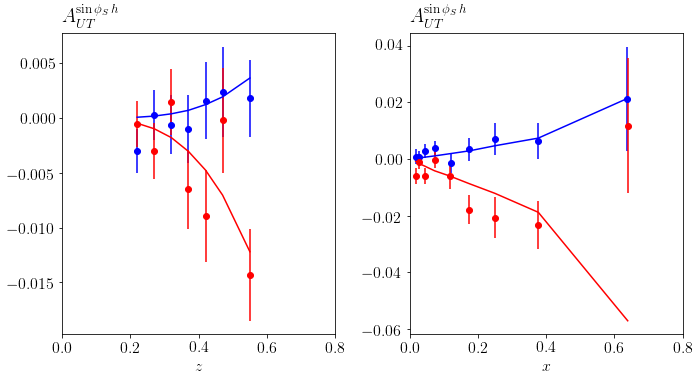

In [17]:
plotAUTsinphiS(data[9011],data[9022],data[9033],data[9044],'$A_{UT}^{\sin\phi_S\,h}$','$A_{UT}^{\sin\phi_S\,h}$','$A_{UT}^{\sin\phi_S\,h}$','$A_{UT}^{\sin\phi_S\,h}$')

In [12]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,1)
Z=np.append(Z1,Z2)
Q2=2
#Hpipu=[conf['collinspi'].get_C(z,Q2)[1] for z in Z]
#Hpipd=[conf['collinspi'].get_C(z,Q2)[3] for z in Z]
#Hpizu=[(conf['collinspi'].get_C(z,Q2)[1]+conf['aux'].charge_conj(conf['collinspi'].get_C(z,Q2))[1])*.5 for z in Z]
#Hpizd=[(conf['collinspi'].get_C(z,Q2)[3]+conf['aux'].charge_conj(conf['collinspi'].get_C(z,Q2))[3])*.5 for z in Z]

In [13]:
X1=10**np.linspace(-4,-2)
X2=np.linspace(0.0101,1)
X=np.append(X1,X2)
Q2=2.
TRu= [conf['transversity'].get_C(x,Q2)[1] for x in X]
TRd= [conf['transversity'].get_C(x,Q2)[3] for x in X]

In [14]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,1)
Z=np.append(Z1,Z2)
Q2=2
Htildepipu=[conf['Htildepi'].get_C(z,Q2)[1] for z in Z]
Htildepipd=[conf['Htildepi'].get_C(z,Q2)[3] for z in Z]

/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


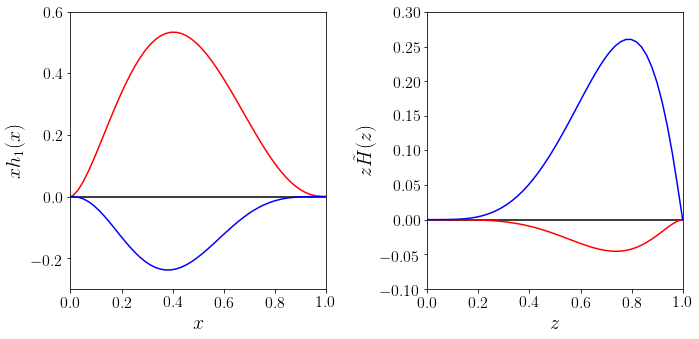

In [15]:
nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
#ax.fill_between(X,X*(TR['f'][1]-TR['df'][1]),X*(TR['f'][1]+TR['df'][1]),color='r',alpha=0.5,label="u")
#ax.fill_between(X,X*(TR['f'][3]-TR['df'][3]),X*(TR['f'][3]+TR['df'][3]),color='b',alpha=0.5,label="d")
ax.plot(X,X*0,'black')
ax.plot(X,X*TRu,'r')
ax.plot(X,X*TRd,'b')
ax.set_ylabel(r'$x h_{1}(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.set_ylim(-0.3,0.6)
ax.set_xlim(0.,1)
#xmin=np.amin(tab['x'])
#xmax=np.amax(tab['x'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)

#ax=py.subplot(nrows,ncols,2)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
#ax.plot(Z,Z*0,'black')
#ax.plot(Z,2*Z**2*0.135*Hpipu,'r')
#ax.plot(Z,2*Z**2*0.135*Hpipd,'b')
#ax.plot(Z,2*Z**2*0.135*Hpizu,'green')
#ax.plot(Z,2*Z**2*0.135*Hpizd,'purple')
#ax.set_ylabel(r'$2z^2M_h H_1^{\perp (1)}(z)$',size=20)
#ax.set_xlabel(r'$z$',size=20)
#ax.set_ylim(-0.1,0.6)
#ax.set_xlim(0,1)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
#ax.legend(fontsize=20,frameon=False)

ax=py.subplot(nrows,ncols,2)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Htildepipu,'r')
ax.plot(Z,Z*Htildepipd,'b')
ax.set_ylabel(r'$z\tilde{H}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.1,0.3)
ax.set_xlim(0,1)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)



py.tight_layout()

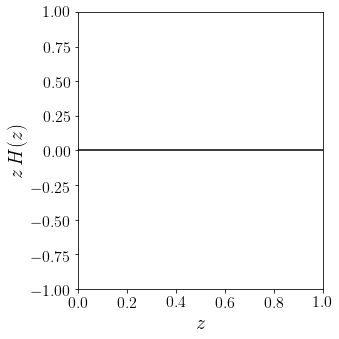

In [16]:
nrows,ncols=1,1
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
#ax.plot(Z,Z*(-2*Z*Hpipu+Htildepipu),'r')
#ax.plot(Z,Z*(-2*Z*Hpipd+Htildepipd),'b')
ax.set_ylabel(r'$z\,H(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-1,1)
ax.set_xlim(0,1)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)


py.tight_layout()